<a href="https://colab.research.google.com/github/Kusuma-Bhargavi-Nadendla/Machine-Learning/blob/main/ML_LAB1_SIMPLE_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
#reading data
data=pd.read_csv('MBA Salary.csv')
print(data)

    S.No  Percentge in Grade 10  Salary
0      1                  62.00  270000
1      2                  76.33  200000
2      3                  72.00  240000
3      4                  60.00  250000
4      5                  61.00  180000
5      6                  55.00  300000
6      7                  70.00  260000
7      8                  68.00  235000
8      9                  82.80  425000
9     10                  59.00  240000
10    11                  58.00  250000
11    12                  60.00  180000
12    13                  66.00  428000
13    14                  83.00  450000
14    15                  68.00  300000
15    16                  37.33  240000
16    17                  79.00  252000
17    18                  68.40  280000
18    19                  70.00  231000
19    20                  59.00  224000
20    21                  63.00  120000
21    22                  50.00  260000
22    23                  69.00  300000
23    24                  52.00  120000


In [ ]:

#print shape and head
print(data.shape)
print(data.head())
print(data.tail())
print(data.info())
print(data.describe())

(50, 3)
   S.No  Percentge in Grade 10  Salary
0     1                  62.00  270000
1     2                  76.33  200000
2     3                  72.00  240000
3     4                  60.00  250000
4     5                  61.00  180000
    S.No  Percentge in Grade 10  Salary
45    46                  57.58  180000
46    47                  68.00  180000
47    48                  69.00  270000
48    49                  66.00  240000
49    50                  60.80  300000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   S.No                   50 non-null     int64  
 1   Percentge in Grade 10  50 non-null     float64
 2   Salary                 50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB
None
           S.No  Percentge in Grade 10         Salary
count  50.00000              50.000000      50.

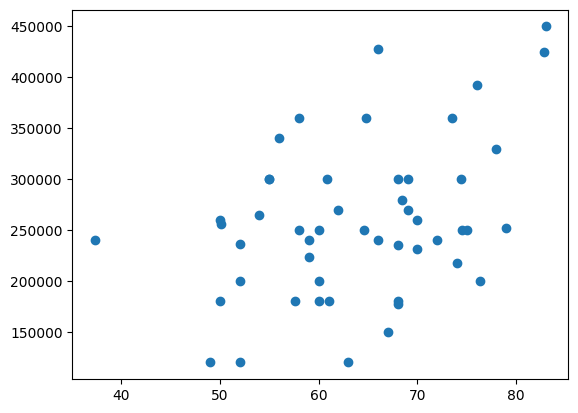

In [ ]:
#Get input and output columns
X=data['Percentge in Grade 10']
Y=data['Salary']
plt.scatter(X,Y)


In [ ]:
# need to add the constant b_0  to the equation using the add_constant() method.
X=sm.add_constant(X)
print(X,Y)

    const  Percentge in Grade 10
0     1.0                  62.00
1     1.0                  76.33
2     1.0                  72.00
3     1.0                  60.00
4     1.0                  61.00
5     1.0                  55.00
6     1.0                  70.00
7     1.0                  68.00
8     1.0                  82.80
9     1.0                  59.00
10    1.0                  58.00
11    1.0                  60.00
12    1.0                  66.00
13    1.0                  83.00
14    1.0                  68.00
15    1.0                  37.33
16    1.0                  79.00
17    1.0                  68.40
18    1.0                  70.00
19    1.0                  59.00
20    1.0                  63.00
21    1.0                  50.00
22    1.0                  69.00
23    1.0                  52.00
24    1.0                  49.00
25    1.0                  64.60
26    1.0                  50.00
27    1.0                  74.00
28    1.0                  58.00
29    1.0 

In [ ]:
#split the datset
train_X,test_X,train_y,test_y=train_test_split(X,Y,train_size=0.8,random_state=100)

#fit the ols(Ordinary least squares) model
salary_model=sm.OLS(train_y,train_X).fit()

In [ ]:
#print the estimated parameters
print(salary_model.params)

const                    28442.881168
Percentge in Grade 10     3590.785454
dtype: float64


In [ ]:
print("For every 1% increase in Grade 10, the salary of the MBA students will increase by ",salary_model.params[1])

For every 1% increase in Grade 10, the salary of the MBA students will increase by  3590.7854537285616


In [ ]:
#print the summary
print(salary_model.summary())
#greater the r2 value , better the model is.

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     10.39
Date:                Sat, 30 Mar 2024   Prob (F-statistic):            0.00261
Time:                        07:53:10   Log-Likelihood:                -502.34
No. Observations:                  40   AIC:                             1009.
Df Residuals:                      38   BIC:                             1012.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.844e+

<Figure size 800x600 with 0 Axes>

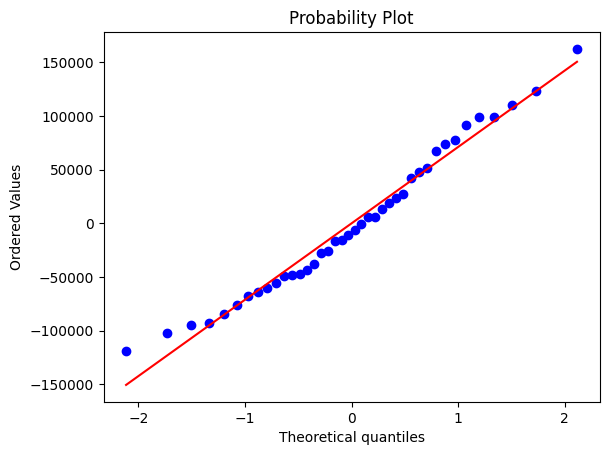

<Figure size 800x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import probplot
%matplotlib inline
mba_salary_resid = salary_model.resid
probplot(mba_salary_resid,plot=plt)
#probplot = sm.ProbPlot(mba_salary_resid)
plt.figure( figsize = (8, 6))
#probplot.ppplot( line='45' )



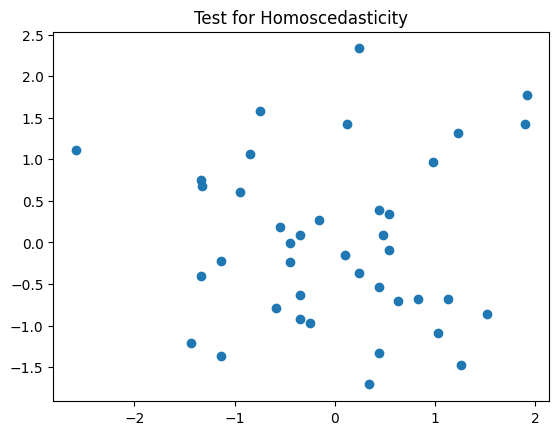

In [ ]:
#Test for Homoscedasticity
def standardize(vals):
  return (vals-vals.mean())/vals.std()
plt.scatter(standardize(salary_model.fittedvalues),standardize(salary_model.resid))
plt.title("Test for Homoscedasticity")
plt.show()
#If funnel shape exists, Heteroscedasticity

In [ ]:
#Outlier analysis
#Z-score analysis
from scipy.stats import zscore
data['z_score']=zscore(data['Salary'])
data[(data['z_score']>3.0) | (data['z_score']<-3.0)]
#No outliers

,S.No,Percentge in Grade 10,Salary,z_score


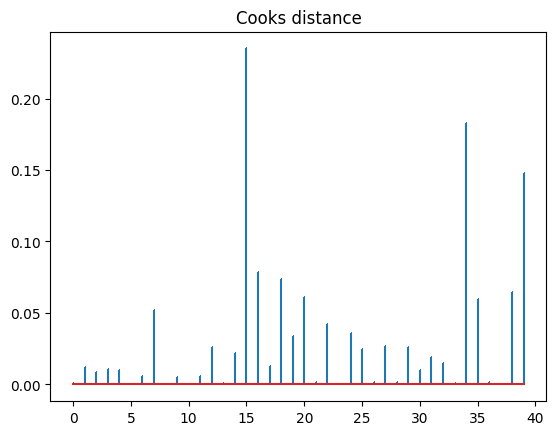

In [ ]:
#Cook's distance
influence=salary_model.get_influence()
(c,p)=influence.cooks_distance
plt.stem(np.arange(len(train_X)),np.round(c,3),markerfmt=",")
plt.title("Cooks distance")
plt.show()

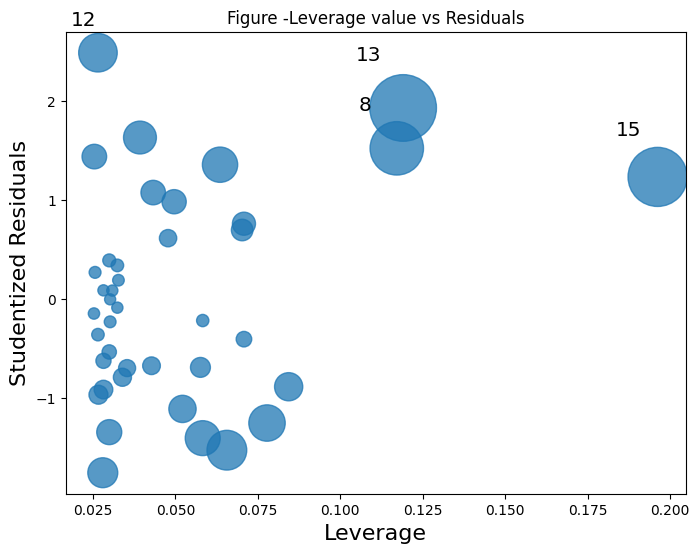

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(8,6))
influence_plot(salary_model,ax=ax)
plt.title("Figure -Leverage value vs Residuals")
plt.show()

In [ ]:
#predict with percentage
salary_model.predict(np.array([50,1]))

array([1425734.84386801])

In [ ]:
#compare actual values of test dataset and predictions
performance=pd.DataFrame()
performance['Predictions']=salary_model.predict(test_X)
performance['Actual results']=test_y
performance

,Predictions,Actual results
6,279797.862929,260000
36,272616.292022,177600
37,215163.724762,236000
28,236708.437485,360000
43,295956.397471,250000
49,246762.636755,300000
5,225936.081123,300000
33,308524.146559,330000
20,254662.364753,120000
42,295597.318926,300000


In [ ]:
#chcek for normal distribution
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

salary_model.resid

0      18928.420701
11    -63890.008392
18    -48797.862929
45    -55200.307594
38     42654.704330
25    -10407.621479
26    -27982.153855
35    110473.133423
17      5947.393797
7     -37616.292022
47     -6207.077476
31    -43890.008392
32     74063.918877
19    -16299.222938
21     52017.846145
13    123521.926172
1    -102527.534851
4     -67480.793846
12    162565.278886
27    -76161.004744
40     91657.424348
22     23792.922524
29   -119025.506568
9       -299.222938
16    -60114.932013
44     67634.387983
48    -25434.721114
46    -92616.292022
14     27383.707978
41     98874.221430
2     -46979.433837
34     47730.583309
30    -47751.790198
10     13291.562515
15     77513.097844
23    -95163.724762
39    -15163.724762
3       6109.991608
24    -84391.368401
8      99240.083263
dtype: float64

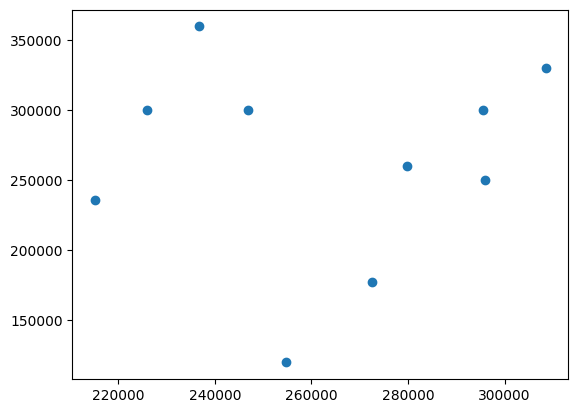

In [ ]:
#plot with predicted vs actual values
plt.scatter(performance['Predictions'],performance['Actual results'])

In [ ]:
#find r2 score of model
pred_y=salary_model.predict(test_X)
np.abs(r2_score(test_y,pred_y))


0.1596550778785275

In [ ]:
#rmse
import sklearn
np.sqrt(sklearn.metrics.mean_squared_error(test_y,pred_y))

73553.53875591327

In [ ]:
#Now let's remove outliers to improve the performance of modal.
def remove_outliers_iqr(data):
  q1=data.quantile(0.25)
  q3=data.quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  return (data>=lower_bound) & (data<=upper_bound)

In [ ]:
data_model2=data[remove_outliers_iqr(data['Salary'])]
data_model2

,S.No,Percentge in Grade 10,Salary,z_score
0,1,62.00,270000,0.157863
1,2,76.33,200000,-0.763928
2,3,72.00,240000,-0.237190
3,4,60.00,250000,-0.105506
4,5,61.00,180000,-1.027297
5,6,55.00,300000,0.552917
6,7,70.00,260000,0.026179
7,8,68.00,235000,-0.303032
8,9,82.80,425000,2.198973
9,10,59.00,240000,-0.237190


In [ ]:
#now build the model again
new_x=data_model2['Percentge in Grade 10']
X=sm.add_constant(new_x)
Y=data_model2['Salary']
train_x,test_x,train_y,testy=train_test_split(X,Y,train_size=0.8,random_state=200)
model2=sm.OLS(train_y,train_x).fit()
y_pred=model2.predict(test_x)
print('New R2 Score is ',np.abs(r2_score(test_y,y_pred)))
#New model works with improved accuarcy.

New R2 Score is  0.37833930945772876


In [ ]:
#Using linear regression
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(train_X,train_y)

LinearRegression()

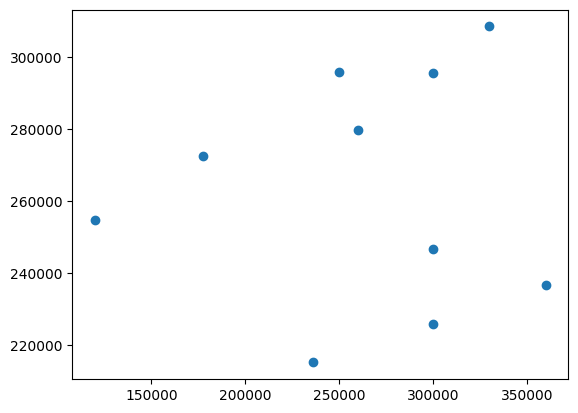

In [ ]:
#plot with predicted vs actual values
predictions=lm.predict(test_X)
plt.scatter(test_y,predictions)

In [ ]:
#r2 value
r2_value=lm.score(test_X,test_y)
print('R2 Score of model is ',r2_value)

R2 Score of model is  -0.15965507787852773


Model Diagnostics

In [ ]:
#find r2 score of model
pred_y=salary_model.predict(test_X)
r2_score(test_y,pred_y)


-0.1596550778785275

In [ ]:
#Root mean square error is the average error the model makes. Lesser the value, better the model.
rmse=np.sqrt(mean_squared_error(test_y,pred_y))

73553.53875591327